In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

import seaborn as sns
sns.set()

In [15]:
full_data = pd.read_csv('final_station_data.csv')
full_data.head()

,Unnamed: 0,mapped_addy,power_kwh_num,available_denominator,available_numerator,availability_rate,utilization_rate,total_output_kwh,utilization_numerator,lodging,...,gym,library,local_government_office,doctor,stadium,museum,church,synagogue,lat,lon
0,0,"6410 Overland Ave, Emeryville, CA 94608",15.2,24,10.000000,0.416667,0.583333,8.866667,14.000000,3,...,6,0,3,60,0,0,0,0,37.844267,-122.293271
1,3,"1025 Gilman St, Berkeley, CA 94710",103.6,5,4.065819,0.813164,0.186836,19.356240,0.934181,0,...,7,0,2,3,1,0,2,0,37.880724,-122.297818
2,6,"2000 Powell St Suite 100, Emeryville, CA 94608",28.4,69,63.261403,0.916832,0.083168,2.361973,5.738597,1,...,3,0,1,60,0,0,0,0,37.837853,-122.301716
3,10,"247 E 18th St, Oakland, CA 94606",7.2,8,3.000000,0.375000,0.625000,4.500000,5.000000,1,...,6,0,0,9,0,2,7,0,37.799430,-122.253247
4,13,"5901 Shellmound St, Emeryville, CA 94608",110.8,7,6.014539,0.859220,0.140780,15.598442,0.985461,8,...,3,0,2,60,0,0,0,0,37.840334,-122.293845


In [36]:
full_data["special_y"] = full_data["utilization_rate"] * (full_data["available_denominator"])

In [17]:
full_data["total_y"] = full_data["utilization_rate"] * (full_data["available_denominator"] - full_data["utilization_numerator"])

In [112]:
# extract y_variable and x_variables
best_data = full_data[['mapped_addy', 'lat', 'lon', 'available_denominator', 'utilization_numerator', 'utilization_rate', 'total_y',
                       'special_y','lodging', 'supermarket', 'pharmacy', 'park', 'restaurant', 'clothing_store', 'store', 
                       'school', 'gym', 'library', 'local_government_office', 'doctor', 'stadium', 'museum', 'church','synagogue']]

In [113]:
best_data = best_data[best_data['utilization_rate'] > 0.0]

In [114]:
from sklearn.model_selection import train_test_split
from sklearn.utils import resample
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import plot_tree
from sklearn import tree

X_train, X_val, y_train, y_val = train_test_split(best_data.loc[:, "lodging":], best_data["total_y"], test_size = 0.15, random_state = 42)

In [117]:
forest_model = RandomForestRegressor(n_estimators = 300, max_features = 1, max_depth = 3).fit(X_train,y_train)

train_forest_pred = forest_model.predict(X_train)
val_forest_pred = forest_model.predict(X_val)

In [118]:
def rmses(train_pred, val_pred, type):

  train_rmse = np.mean((train_pred - y_train) ** 2) ** 0.5
  val_rmse = np.mean((val_pred - y_val) ** 2) ** 0.5
  print(f"Training set error for {type}: ", train_rmse)
  print(f"Validation set error for {type}:", val_rmse)

rmses(train_forest_pred, val_forest_pred, "Random Forest")
print("All errors as RMSE")

Training set error for Random Forest:  2.2417122000996055
Validation set error for Random Forest: 0.9587836604521243
All errors as RMSE


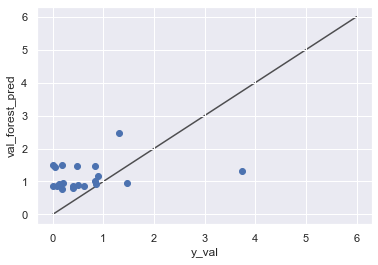

In [119]:
plt.scatter(y_val, val_forest_pred,)
lims = [
    np.min([0, 0]),  # min of both axes
    np.max([6, 6]),  # max of both axes
]

# now plot both limits against eachother
plt.plot(lims, lims, 'k-', alpha=0.75, zorder=0)
plt.ylabel("val_forest_pred")
plt.xlabel("y_val");


In [120]:
[print(pred, true) for pred, true in zip(val_forest_pred, y_val)]

0.9610785361704695 1.457886509003212
0.8030805317054523 0.39719961275054677
0.8503378754503711 0.6110733034607336
0.8540402600202797 0.40713236522610824
0.9229437085672236 0.12279183673469389
1.469303112608098 0.827182530651307
0.8987606874452089 0.49732778150481394
2.481766701779535 1.3030632154006243
0.7811505246827367 0.1889470264354843
1.3137111207999401 3.7329875865889757
1.4845825946139506 0.47093884651540613
1.434655109553242 0.051510316060580714
1.4952493789613723 0.0
0.9149302239764093 0.846727744642094
1.0221123768026041 0.833188339352864
0.9441533923534878 0.20340650437868918
1.501407328023397 0.19405984639748375
0.87237410071429 0.08578651081071384
0.859853581497609 0.0
1.1691668012577698 0.8907330246913581


[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

In [121]:
val_results_df = best_data.loc[y_val.index]

In [122]:
val_results_df["predicted_y"] = val_forest_pred
val_results_df["difference"] = val_results_df["predicted_y"] - val_results_df["special_y"]
val_results_df

,mapped_addy,lat,lon,available_denominator,utilization_numerator,utilization_rate,total_y,special_y,lodging,supermarket,...,gym,library,local_government_office,doctor,stadium,museum,church,synagogue,predicted_y,difference
61,133 La Casa Via,37.912610,-122.039618,6,3.502674,0.583779,1.457887,3.502674,0,0,...,1,0,1,60,0,0,3,0,0.961079,-2.541595
94,201 41st St,37.827557,-122.253856,8,0.419162,0.052395,0.397200,0.419162,2,1,...,13,2,1,60,0,0,4,0,0.803081,0.383919
21,"4400 Shellmound St, Emeryville, CA 94608",37.831754,-122.291971,5,0.712646,0.142529,0.611073,0.712646,2,0,...,2,0,3,3,0,0,0,0,0.850338,0.137692
35,"1999 Harrison St, Oakland, CA 94612",37.807867,-122.264843,2,0.569030,0.284515,0.407132,0.569030,4,0,...,10,3,15,59,0,1,5,0,0.854040,0.285010
86,111 N Wiget Ln,37.925090,-122.024387,2,0.131429,0.065714,0.122792,0.131429,0,0,...,5,0,1,60,0,1,2,0,0.922944,0.791515
129,"131 Oyster Point Blvd, South San Francisco, CA...",37.662659,-122.395617,6,0.990795,0.165132,0.827183,0.990795,3,0,...,2,0,1,13,0,0,0,0,1.469303,0.478508
60,2001 Diamond Blvd,37.972341,-122.057805,2,1.073106,0.536553,0.497328,1.073106,2,2,...,3,0,5,4,0,0,0,0,0.898761,-0.174345
140,"800 S Airport Blvd, San Francisco, CA 94128",37.633178,-122.396765,10,1.540323,0.154032,1.303063,1.540323,0,0,...,0,0,0,0,0,0,0,0,2.481767,0.941444
70,160 Crescent Dr,37.944202,-122.061469,4,0.198830,0.049708,0.188947,0.198830,2,1,...,2,2,15,17,0,0,1,0,0.781151,0.582320
28,"551-599 7th St, Oakland, CA 94607",37.800281,-122.277902,18,5.284327,0.293574,3.732988,5.284327,12,0,...,4,0,18,31,0,2,8,0,1.313711,-3.970616


In [124]:
data_for_map= val_results_df[['lat','lon','predicted_y']]
data_for_map

,lat,lon,predicted_y
61,37.912610,-122.039618,0.961079
94,37.827557,-122.253856,0.803081
21,37.831754,-122.291971,0.850338
35,37.807867,-122.264843,0.854040
86,37.925090,-122.024387,0.922944
129,37.662659,-122.395617,1.469303
60,37.972341,-122.057805,0.898761
140,37.633178,-122.396765,2.481767
70,37.944202,-122.061469,0.781151
28,37.800281,-122.277902,1.313711


In [125]:
data_for_map.to_csv('Predcicted_Locations.csv')